#### 6.6 Analyzing Time-Series Data

##### Importing libraries & data

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import warnings 
import statsmodels.api as sm

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [5]:
%matplotlib inline

In [7]:
#Define Path
path = r'C:\Users\danac\Downloads\Achievement 6\Data\Cleaned Data\cleaned_data.xlsx'

In [9]:
#Importing Data
dataframe = pd.read_excel(path)

In [11]:
dataframe.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,496,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,496,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,496,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,496,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,496,18,85.21,2012


In [13]:
dataframe['year'] = pd.to_datetime(dataframe['year'], format='%Y')

In [17]:
dataframe.shape

(2200, 14)

In [19]:
#Setting the 'date' column as the index
dataframe.set_index('year', inplace=True)

In [21]:
dataframe.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
year,,,,,,,,,,,,,
2012-01-01,1,Harvard University,USA,1,7,9,1,1,1,1,496,5,100.00
2012-01-01,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,496,1,91.67
2012-01-01,3,Stanford University,USA,3,17,11,5,4,2,2,496,15,89.50
2012-01-01,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,496,50,86.17
2012-01-01,5,California Institute of Technology,USA,4,2,29,7,37,22,22,496,18,85.21


In [23]:
#Resample the data frequency, summing the number of publications
df2 = dataframe['publications'].resample('M').sum()

In [25]:
df2

year
2012-01-31      5502
2012-02-29         0
2012-03-31         0
2012-04-30         0
2012-05-31         0
2012-06-30         0
2012-07-31         0
2012-08-31         0
2012-09-30         0
2012-10-31         0
2012-11-30         0
2012-12-31         0
2013-01-31      5467
2013-02-28         0
2013-03-31         0
2013-04-30         0
2013-05-31         0
2013-06-30         0
2013-07-31         0
2013-08-31         0
2013-09-30         0
2013-10-31         0
2013-11-30         0
2013-12-31         0
2014-01-31    500411
2014-02-28         0
2014-03-31         0
2014-04-30         0
2014-05-31         0
2014-06-30         0
2014-07-31         0
2014-08-31         0
2014-09-30         0
2014-10-31         0
2014-11-30         0
2014-12-31         0
2015-01-31    500419
Freq: ME, Name: publications, dtype: int64

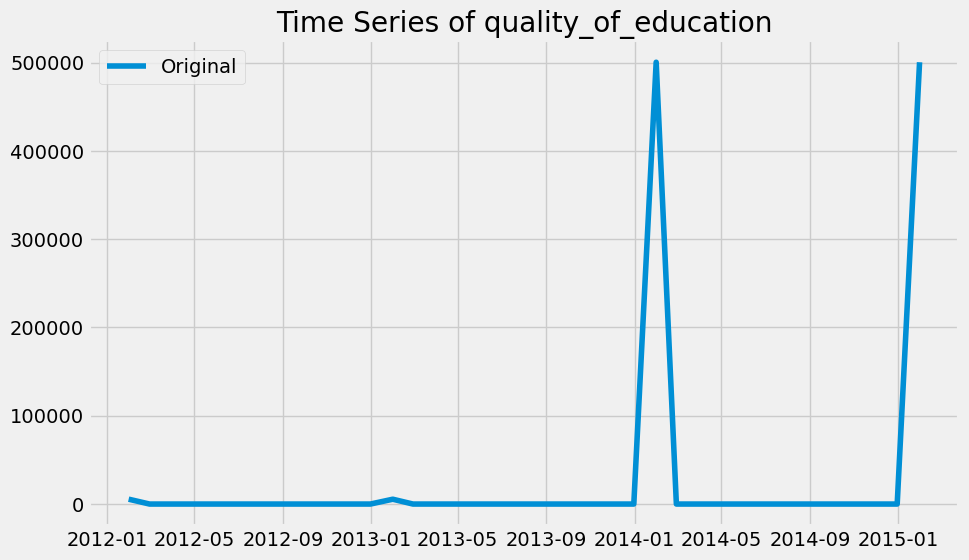

In [27]:
#Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(df2, label='Original')
plt.title('Time Series of quality_of_education')
plt.legend()
plt.show()

#### This time series shows the behavior of the variable quality_of_education over time from approximately January 2012 to January 2015.
#### Initial Near Zero Values(2012-2013):For most of the initial period (2012 to mid-2013), the values of quality_of_education remain close to 0, indicating stability at very low levels or no significant activity in that period.
#### The series presents two abrupt peaks (2014 and 2015) that seem to be exceptional events and not normal trends of the variable.

### Time-series analysis: decomposition

In [36]:
#Decompose the time series
decomposition = sm.tsa.seasonal_decompose(df2, model='additive', period=1)

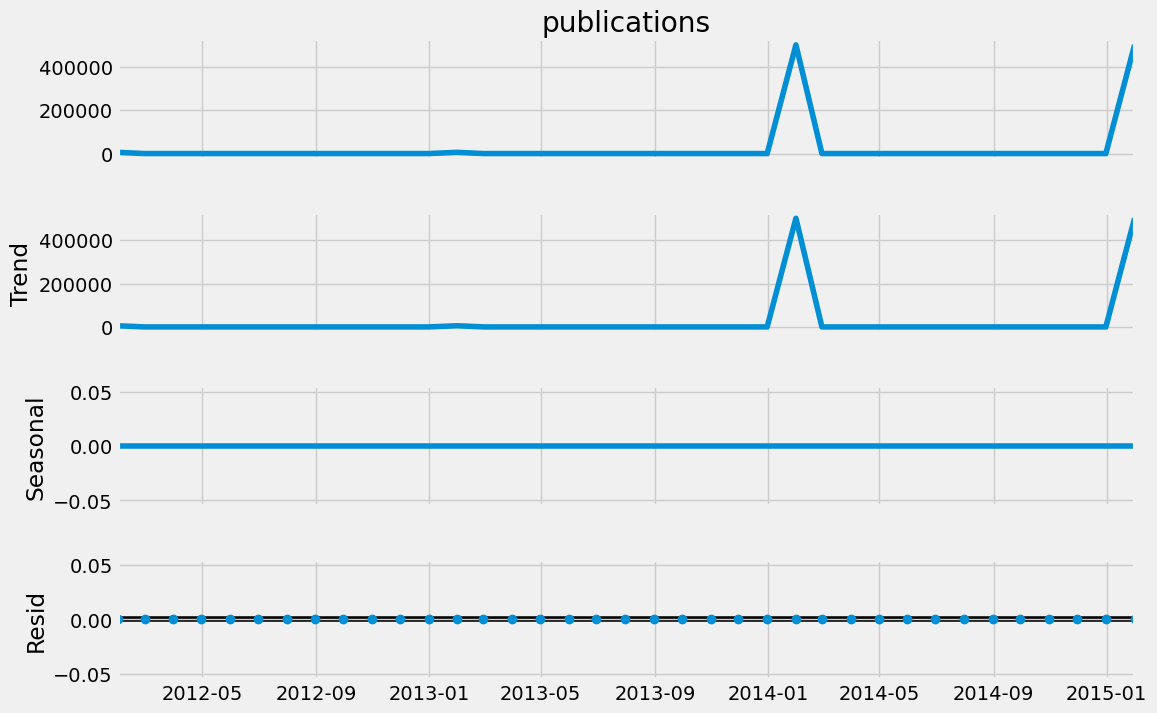

In [38]:
#Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

#### Series Dominated by Sharp Peaks: The trend reflects two specific events (January 2014 and January 2015) that explain almost all the variability in the series. Non-significant residuals: The series is relatively simple and the residuals are minimal, suggesting that there is no additional noise to analyze.

### Testing for stationarity

In [41]:
#Function to perform and display the Dickey-Fuller test results
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print(result)

# Apply the test using the function on the time series
dickey_fuller(df2)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.432107
p-value                         0.000260
Number of Lags Used             0.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


#### p-value = 0.00026 < 0.05 and Test Statistic < critical values
#### data is stationary. 

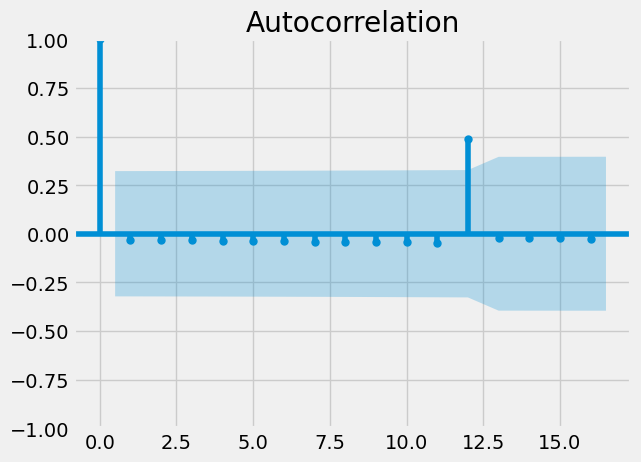

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df2)
plt.show()